# Practice code for Tensorflow and Keras

code adopted from https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/  
modified by Precious Jatau  

In [ ]:
import tensorflow as tf
import numpy as np

Import, prepare MNIST data set  

In [ ]:
# import data set
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(np.concatenate((y_train, y_test))))

# normalize predictors
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

Create neural network

In [ ]:
model = tf.keras.models.Sequential()
# flatten 28x28 input into 784x1
model.add(tf.keras.layers.Flatten())
# fully connected (dense) layer with 128 nodes and relu activation
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# ouput layer, fully connected with num_classes nodes and softmax activation
model.add(tf.keras.layers.Dense(num_classes, activation = tf.nn.softmax))
# compile model 
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Train neural network

In [ ]:
model.fit(x_train, y_train, epochs = 3);

Evaluate on test data

In [8]:
test_loss, test_acc = model.evaluate(x_test,y_test);
print('test loss: ', test_loss)
print('test acc: ', test_acc)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.1031 - accuracy: 0.9691
test loss:  0.10305577937834896
test acc:  0.9691


Visualize first train example

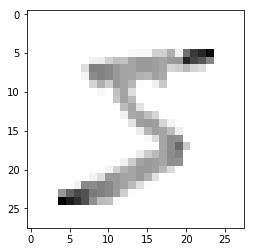

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
model.save('mnist.model');

Predict first test example

In [10]:
loaded_model = tf.keras.models.load_model('mnist.model')
predictions = loaded_model.predict(x_test)
print(np.argmax(predictions[0]))

7


In [ ]:
Visualize first test example

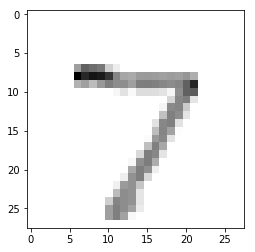

In [11]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()